<a href="https://colab.research.google.com/github/Rohan5076/machine-learning/blob/main/ML_16_Advanced_Ensemble_Techniques(Blending).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blending

Blending is very similar to Stacking. It also uses base models to provide base predictions as new features and a new meta model is trained on the new features that gives the final prediction. The only difference is that training of the meta-model is applied on a separate holdout set (e.g 10% of train_data)rather on full and folded training set.

## Step 1: train_data is split into base_train_data and holdout_set.



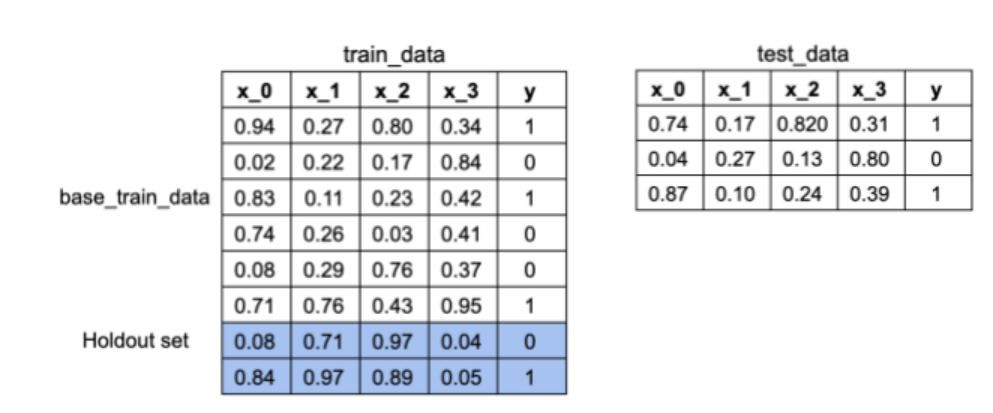

## Step 2: Base models are fitted on base_train_data, and predictions are made on holdout_set and test_data. These will create new prediction features.



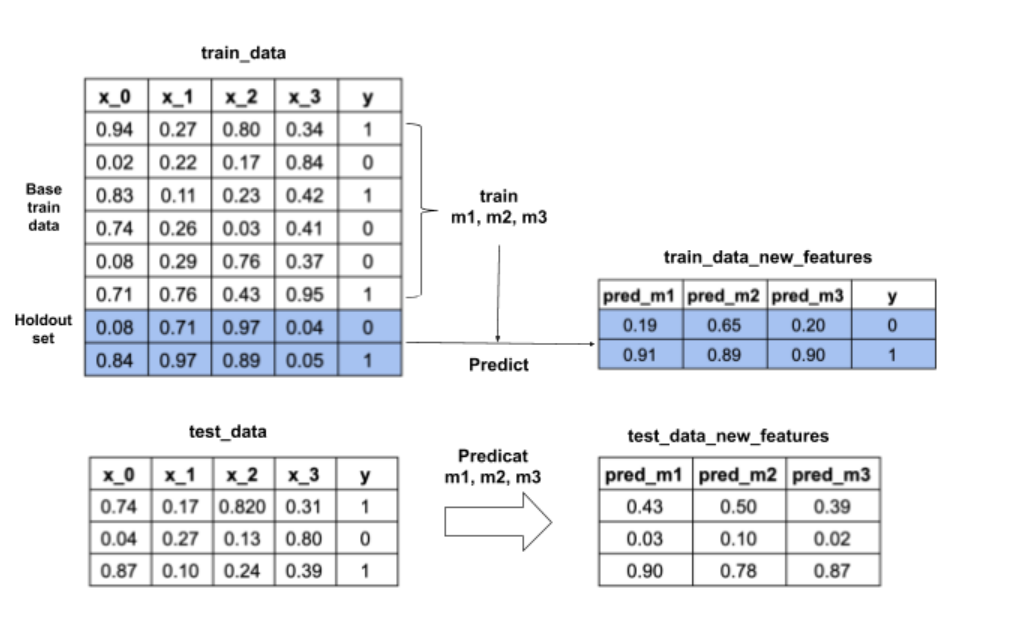

## Step 3: A new meta-model is then fit on holdout_set with new prediction features. Both original and meta features from holdout_set will be used.

## Step 4: The trained meta-model is used to make final predictions on the test data using both original and new meta features.

## Sample Code

Two base models, Decision Tree and KNN, will be trained on the base train data and make predictions on the holdout_set and test_data.

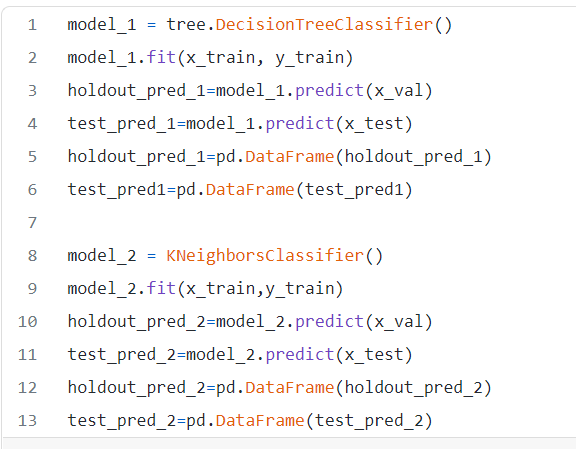

The original and meta features will be combined in holdout set and test_data, and a logistic regression model will be trained and make final predictions on test_data.

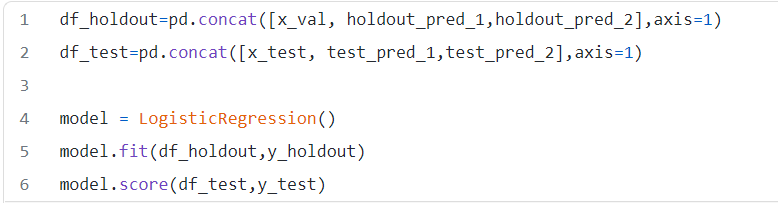

## Blending - Explained Again

Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions are used to build a model which is run on the test set. Here is a detailed explanation of the blending process:

## 1. The train set is split into training and validation sets.



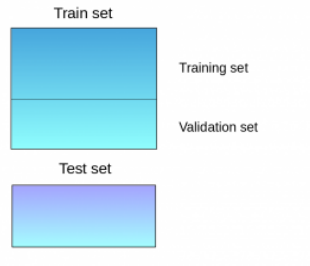

## 2. Model(s) are fitted on the training set.
## 3. The predictions are made on the validation set and the test set.

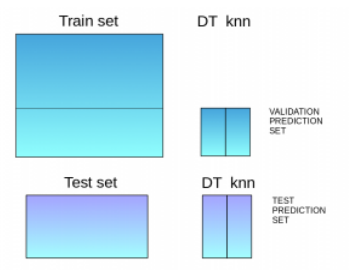

## 4. The validation set and its predictions are used as features to build a new model.
## 5. This model is used to make final predictions on the test and meta-features.

# Sample Code:

We’ll build two models, decision tree and knn, on the train set in order to make predictions on the validation set.

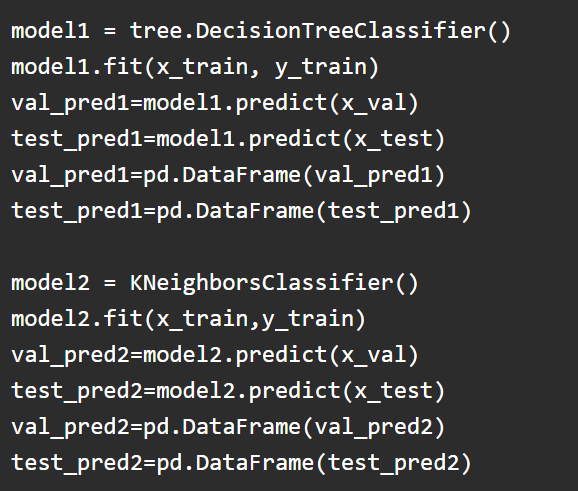

In [ ]:
DTC = DecisionTreeClassifier()   # initialising DecisionTree Classifier
model_DecisionTreeClassifier = DTC.fit(X_train, y_train)   # fitting Training Set
val_pred1=model_DecisionTreeClassifier.predict(X_val)
test_pred1 = model_DecisionTreeClassifier.predict(X_test)   # Predicting on test dataset
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [ ]:
KNC = KNeighborsClassifier()   # initialising KNeighbors Classifier
model_kNeighborsClassifier = KNC.fit(X_train, y_train)   # fitting Training Set
val_pred2=model_kNeighborsClassifier.predict(X_val)
test_pred2 = model_kNeighborsClassifier.predict(X_test)   # Predicting on test dataset
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

Combining the meta-features and the validation set, a logistic regression model is built to make predictions on the test set.

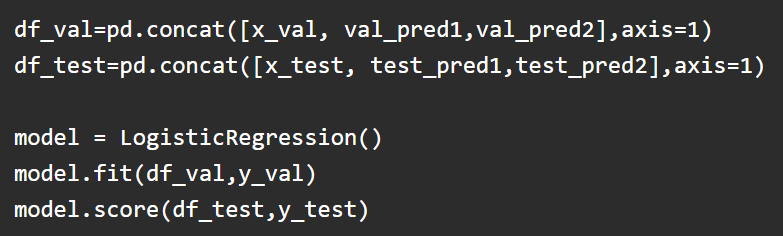

In [16]:
df_val=pd.concat([X,val_pred1,val_pred2],axis=1)
df_test=pd.concat([X_test,test_pred1,test_pred2],axis=1)

model=LogisticRegression()
model.fit(df_val,y)
model.score(df_test,y_test)

NameError: ignored

In [1]:
!pip install pandas 
!pip install -U scikit-learn
!pip install mlxtend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#loading the data set
df = pd.read_csv("/content/drive/MyDrive/All CSV files-20220711T101939Z-001/All CSV files/wheatseeds.csv")
df.head()

Area  Parameter  Compactness  Length of kernel  Width of kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Aymmetery coefficient  length kernel groove  class(1,2,3)  
0                  2.221                 5.220             1  
1                  1.018                 4.956             1  
2                  2.699                 4.825             1  
3                  2.259                 4.805             1  
4                  1.355                 5.175             1

In [6]:
# Creating X and y for training
X = df.drop('class(1,2,3)', axis = 1)
y = df['class(1,2,3)']

In [7]:
# 20 % training dataset is considered for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
#initializing sc object
sc = StandardScaler() 
# variables that needed to be transformed
var_transform = ['Area', 'Parameter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Aymmetery coefficient', 'length kernel groove']
X_train[var_transform] = sc.fit_transform(X_train[var_transform])   # standardizing training data
X_test[var_transform] = sc.transform(X_test[var_transform])            # standardizing test data
print(X_train.head())

         Area  Parameter  Compactness  Length of kernel  Width of kernel  \
150 -1.053856  -1.040832    -0.888808         -0.861746        -1.130186   
96   1.529271   1.549570     0.463557          1.608780         1.462880   
200 -0.863920  -0.878932    -0.409757         -0.962584        -0.731870   
68  -0.176698  -0.146527     0.086251         -0.160465        -0.293454   
156 -1.223071  -1.318376    -0.464869         -1.343017        -1.106127   

     Aymmetery coefficient  length kernel groove  
150               1.035482             -0.223421  
96               -0.126599              1.690317  
200               1.222849             -0.761981  
68               -1.488222             -0.237810  
156              -0.214533             -0.848315  


In [14]:
DTC = DecisionTreeClassifier()   # initialising DecisionTree Classifier
model_DecisionTreeClassifier = DTC.fit(X_train, y_train)   # fitting Training Set
val_pred1=model_DecisionTreeClassifier.predict(X)
test_pred1 = model_DecisionTreeClassifier.predict(X_test)   # Predicting on test dataset
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [15]:
KNC = KNeighborsClassifier()   # initialising KNeighbors Classifier
model_kNeighborsClassifier = KNC.fit(X_train, y_train)   # fitting Training Set
val_pred2=model_kNeighborsClassifier.predict(X)
test_pred2 = model_kNeighborsClassifier.predict(X_test)   # Predicting on test dataset
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [19]:
df_val=pd.concat([X,val_pred1,val_pred2],axis=1)
df_test=pd.concat([X_test,test_pred1,test_pred2],axis=1)

model=LogisticRegression()
model.fit(df_val,y)
model.score(df_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

ValueError: ignored